In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DSW/train_data.xlsx')
df = data.copy()

In [ ]:
df.shape

(113705, 17)

In [ ]:
pd.concat([df.head(5), df.sample(5), df.tail(5)])

customer_id transaction_date sub_grade        term home_ownership  \
0          10608026       2014-01-01        C5   36 months       MORTGAGE   
1          10235120       2014-01-01        E5   36 months       MORTGAGE   
2          10705805       2014-01-01        D2   36 months       MORTGAGE   
3          11044991       2014-01-01        B4   36 months       MORTGAGE   
4          10161054       2014-01-01        C3   60 months       MORTGAGE   
32629      32019085       2014-10-01        D5   36 months       MORTGAGE   
24974      20628737       2014-07-01        B5   36 months           RENT   
27629      22422595       2014-08-01        C3   36 months       MORTGAGE   
3467       12264941       2014-02-01        D2   60 months       MORTGAGE   
103910     70844109       2016-02-01        E3   60 months       MORTGAGE   
113700     75790158       2016-03-01        D1   36 months           RENT   
113701     74641781       2016-03-01        D2   36 months            OWN   
113702     73712850       2016-03-01        D1   36 months           RENT   
113703     72713907       2016-03-01        C5   36 months       MORTGAGE   
113704     75820776       2016-03-01        E1   60 months       MORTGAGE   

        cibil_score  total_no_of_acc  annual_inc  int_rate  \
0               665                9     70000.0     16.24   
1               660                8     65000.0     23.40   
2               660                7     73000.0     17.57   
3               690                5    118000.0     12.85   
4               665                5     63000.0     14.98   
32629           685                0     74984.0     18.24   
24974           680                0     80000.0     12.49   
27629           665                0     79000.0     13.98   
3467            660                1     38000.0     17.57   
103910          695                1     40000.0     21.18   
113700          670                0     53000.0     16.29   
113701          660                0     40000.0     17.27   
113702          690                0     25000.0     16.29   
113703          680                0     80000.0     15.31   
113704          665                0     48000.0     19.99   

                   purpose  loan_amnt application_type  installment  \
0       debt_consolidation       7200       Individual       253.99   
1         home_improvement       6000       Individual       233.52   
2                    other       8000       Individual       287.50   
3       debt_consolidation      10000       Individual       336.22   
4       debt_consolidation      10000       Individual       237.80   
32629   debt_consolidation      10875       Individual       394.47   
24974   debt_consolidation      20000       Individual       668.98   
27629          credit_card       9775       Individual       334.00   
3467           credit_card      14000       Individual       352.25   
103910  debt_consolidation      10000       Individual       271.55   
113700         credit_card      10000       Individual       353.01   
113701  debt_consolidation       7025       Individual       251.41   
113702         credit_card      10000       Individual       353.01   
113703  debt_consolidation      12625       Individual       439.57   
113704  debt_consolidation      12000       Individual       317.86   

       verification_status  account_bal  emp_length  loan_status  
0                 Verified         4648          11            0  
1          Source Verified        14051          11            1  
2                 Verified        14885          11            0  
3          Source Verified         7542           2            1  
4                 Verified         6318          11            0  
32629         Not Verified         4768           0            1  
24974      Source Verified         5058           1            1  
27629             Verified        34034           0            1  
3467       Source Verified        16892   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [ ]:
display(df.describe(include='all').T)
display(df.describe(include='float').T)
df.describe(include='object').T

count unique                 top    freq  \
customer_id          113705.0    NaN                 NaN     NaN   
transaction_date       113705    NaN                 NaN     NaN   
sub_grade              113705     27                  C2   12549   
term                   113705      2           36 months   71625   
home_ownership         113705      3            MORTGAGE   53462   
cibil_score          113705.0    NaN                 NaN     NaN   
total_no_of_acc      113705.0    NaN                 NaN     NaN   
annual_inc           113705.0    NaN                 NaN     NaN   
int_rate             113705.0    NaN                 NaN     NaN   
purpose                113705     13  debt_consolidation   71770   
loan_amnt            113705.0    NaN                 NaN     NaN   
application_type       113705      2          Individual  113259   
installment          113705.0    NaN                 NaN     NaN   
verification_status    113705      3     Source Verified   48981   
account_bal          113705.0    NaN                 NaN     NaN   
emp_length           113705.0    NaN                 NaN     NaN   
loan_status          113705.0    NaN                 NaN     NaN   

                                              mean                  min  \
customer_id                        43591367.882063             363009.0   
transaction_date     2015-03-04 22:24:20.769535232  2014-01-01 00:00:00   
sub_grade                                      NaN                  NaN   
term                                           NaN                  NaN   
home_ownership                                 NaN                  NaN   
cibil_score                             684.398707                660.0   
total_no_of_acc                           0.272934                  0.0   
annual_inc                            71388.218609                  0.0   
int_rate                                 15.955469                12.05   
purpose                                        NaN                  NaN   
loan_amnt                              15158.14498               1000.0   
application_type                               NaN                  NaN   
installment                              454.24115                33.24   
verification_status                            NaN                  NaN   
account_bal                           15820.487094                  0.0   
emp_length                                5.959782                  0.0   
loan_status                               0.738895                  0.0   

                                     25%                  50%  \
customer_id                   25095970.0           45049317.0   
transaction_date     2014-08-01 00:00:00  2015-04-01 00:00:00   
sub_grade                            NaN                  NaN   
term                                 NaN                  NaN   
home_ownership                       NaN                  NaN   
cibil_score                        665.0                680.0   
total_no_of_acc                      0.0                  0.0   
annual_inc                       43000.0              60000.0   
int_rate                           13.33                14.99   
purpose                              NaN                  NaN   
loan_amnt                         8000.0              13300.0   
application_type                     NaN                  NaN   
installment                       265.74               388.29   
verification_status                  NaN                  NaN   
account_bal                       5656.0              10841.0   
emp_length                           2.0                  6.0   
loan_status                          0.0                  1.0   

                                     75%                  max              std  
customer_id                   61343438.0           76153829.0  20161044.168593  
transaction_date     2015-10-01 00:00:00  2016-03-01 00:00:00              NaN  
sub_grade                         

count          mean           std    min       25%       50%  \
annual_inc   113705.0  71388.218609  60506.155970   0.00  43000.00  60000.00   
int_rate     113705.0     15.955469      3.234215  12.05     13.33     14.99   
installment  113705.0    454.241150    268.251678  33.24    265.74    388.29   

                  75%         max  
annual_inc   85000.00  8900060.00  
int_rate        17.86       28.99  
installment    599.53     1460.43

count unique                 top    freq
sub_grade            113705     27                  C2   12549
term                 113705      2           36 months   71625
home_ownership       113705      3            MORTGAGE   53462
purpose              113705     13  debt_consolidation   71770
application_type     113705      2          Individual  113259
verification_status  113705      3     Source Verified   48981

In [ ]:
try:
    df.drop(['ID'], axis=1, inplace=True)
except:
    print("ID column already dropped")
df.columns

ID column already dropped


Index(['customer_id', 'transaction_date', 'sub_grade', 'term',
       'home_ownership', 'cibil_score', 'total_no_of_acc', 'annual_inc',
       'int_rate', 'purpose', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'account_bal', 'emp_length', 'loan_status'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

customer_id            0
purpose                0
emp_length             0
account_bal            0
verification_status    0
installment            0
application_type       0
loan_amnt              0
int_rate               0
transaction_date       0
annual_inc             0
total_no_of_acc        0
cibil_score            0
home_ownership         0
term                   0
sub_grade              0
loan_status            0
dtype: int64

In [ ]:
df.isnull().sum()

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')
df.select_dtypes(include='category').columns


Index(['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type',
       'verification_status'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(df[i].value_counts(dropna=False))
    print('*'*50)

Unique values in sub_grade are :
sub_grade
C2    12549
C3    12090
C4    11553
C1    10521
C5     9721
D1     8399
D2     6566
D3     5818
D4     5483
D5     4588
E1     4148
E2     3701
B5     3463
E3     3122
E4     2489
E5     2025
F1     1546
B4     1343
F2     1093
F3      961
F4      710
F5      564
G1      418
G2      311
G3      217
G5      156
G4      150
Name: count, dtype: int64
**************************************************
Unique values in term are :
term
36 months    71625
60 months    42080
Name: count, dtype: int64
**************************************************
Unique values in home_ownership are :
home_ownership
MORTGAGE    53462
RENT        47832
OWN         12411
Name: count, dtype: int64
**************************************************
Unique values in purpose are :
purpose
debt_consolidation    71770
credit_card           18830
other                  7351
home_improvement       6865
major_purchase         2060
small_business         1759
medical          

**Exploratory Data Analysis**

Univariate Analysis

In [ ]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots

    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [ ]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='mako')

    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage

    plt.show() # show the plot

In [ ]:
def target_plot(x, target='default'):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    fig,axs = plt.subplots(2, 2, figsize=(12,10))
    axs[0, 0].set_title('Distribution of an default')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of an non-default')
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0,1], color='orange')

    axs[1,0].set_title('Boxplot w.r.t default')
    sns.boxplot(data[target],data[x], ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t non-default - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

In [ ]:
df.select_dtypes(include='integer').columns

Index(['customer_id', 'cibil_score', 'total_no_of_acc', 'loan_amnt',
       'account_bal', 'emp_length', 'loan_status'],
      dtype='object')

Loan Amount

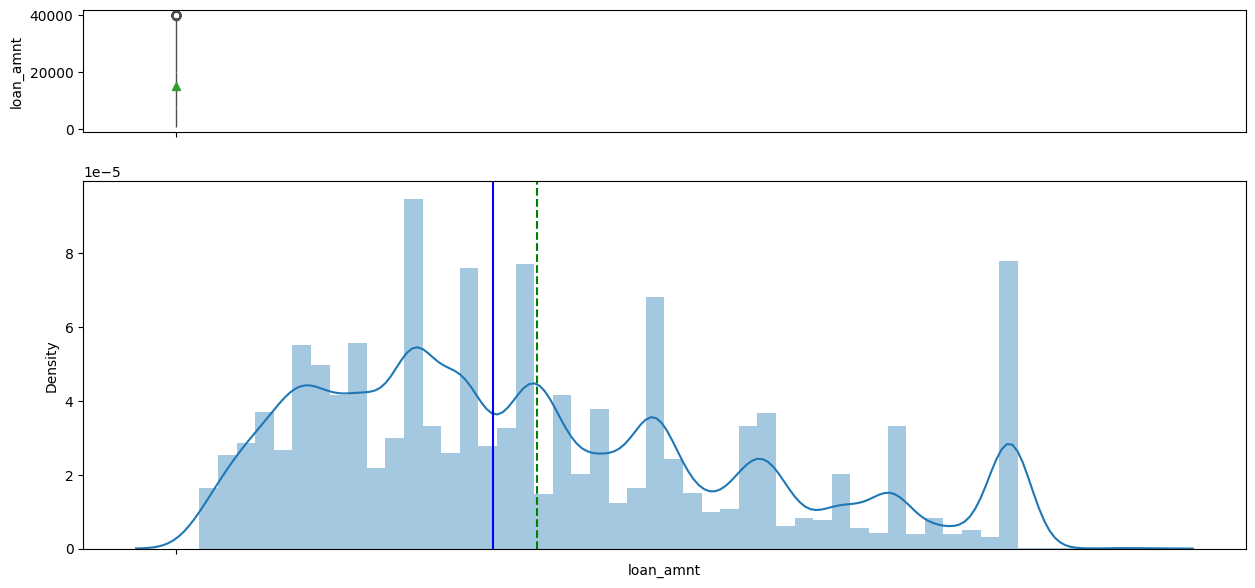

In [ ]:
histogram_boxplot(df.loan_amnt)

Cibil Score

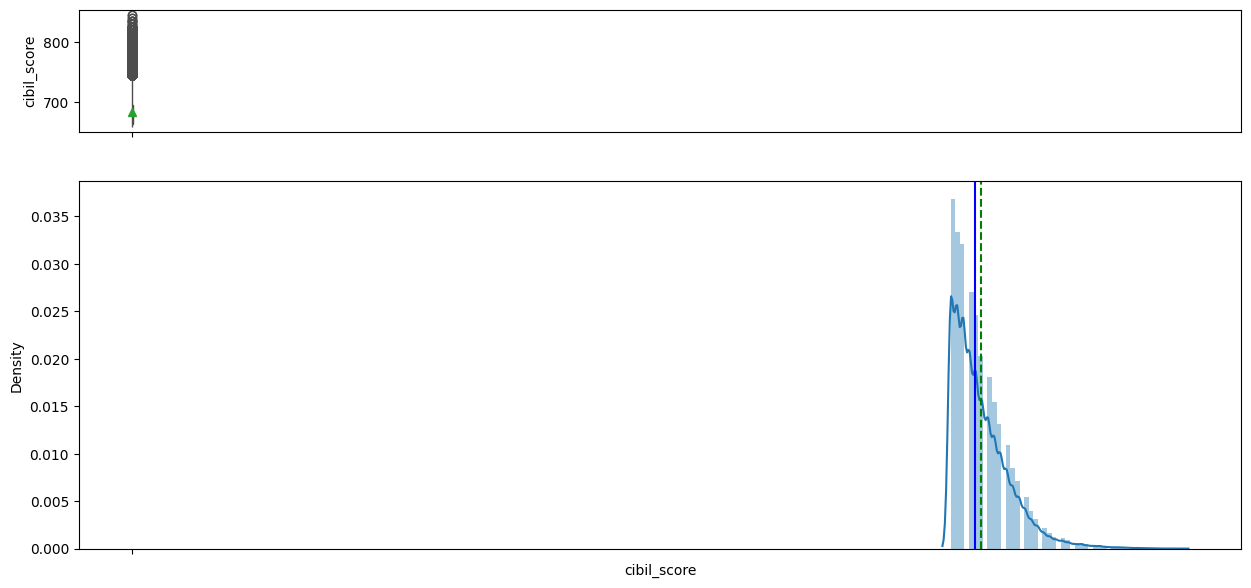

In [ ]:
histogram_boxplot(df.cibil_score)

Total No of account

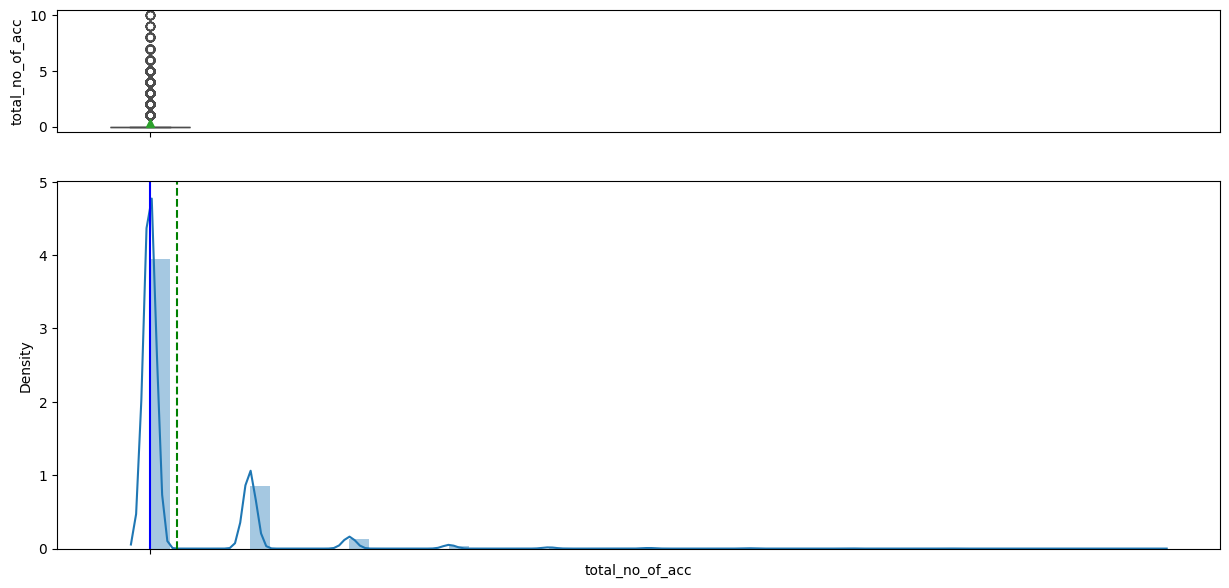

In [ ]:
histogram_boxplot(df.total_no_of_acc)

Account Balance

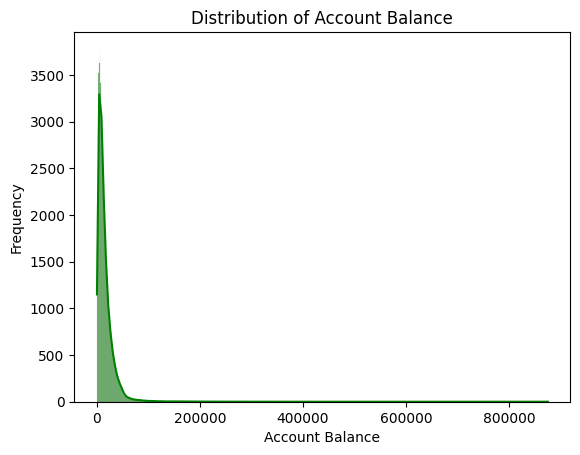

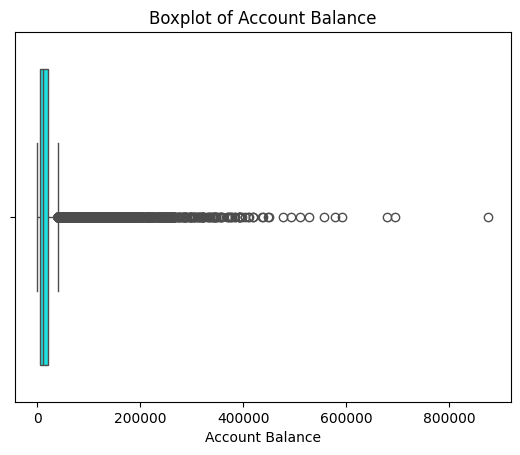

In [ ]:
sns.histplot(df['account_bal'], kde=True, color='green')
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['account_bal'], color='cyan')
plt.title('Boxplot of Account Balance')
plt.xlabel('Account Balance')
plt.show()


Employee Length

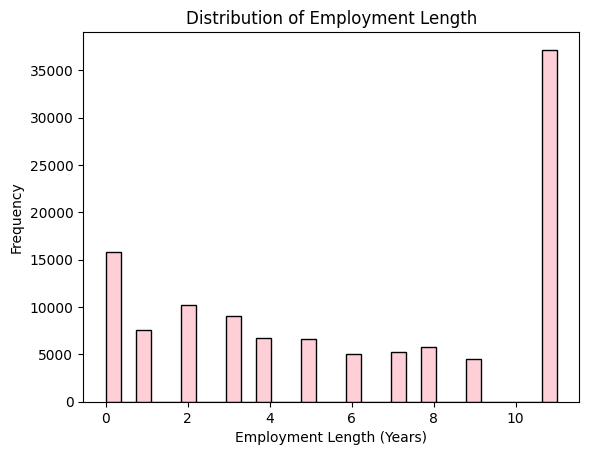

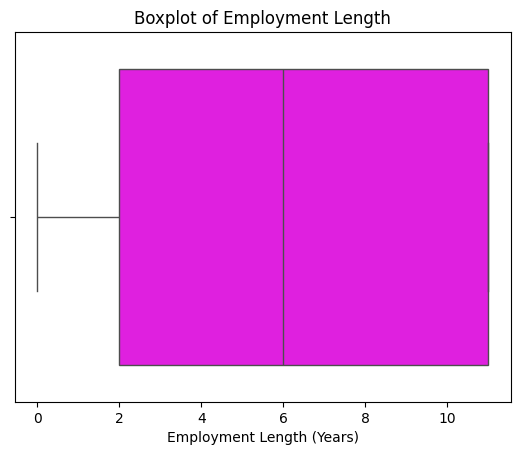

In [ ]:
sns.histplot(df['emp_length'], kde=False, color='pink')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['emp_length'], color='magenta')
plt.title('Boxplot of Employment Length')
plt.xlabel('Employment Length (Years)')
plt.show()


Loan Status

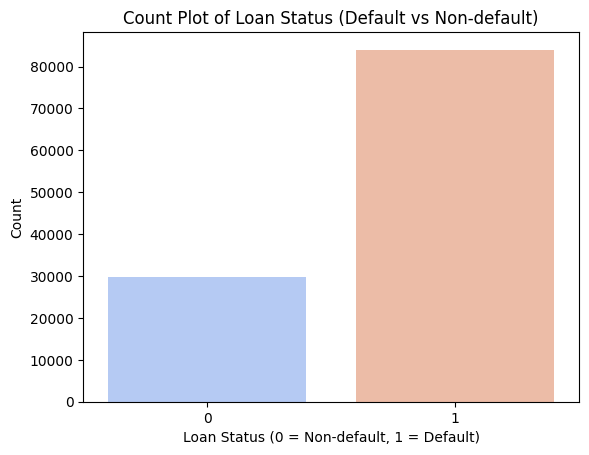

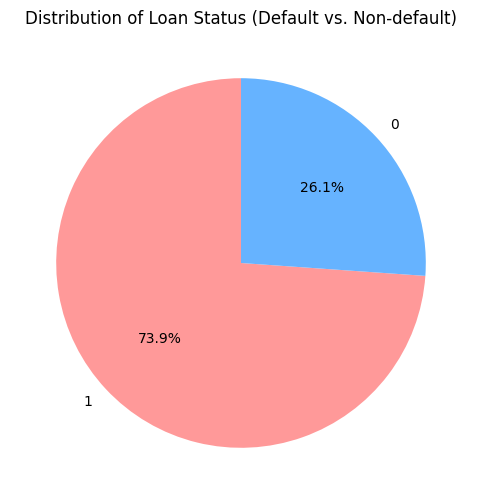

In [ ]:
sns.countplot(x=df['loan_status'], palette='coolwarm')
plt.title('Count Plot of Loan Status (Default vs Non-default)')
plt.xlabel('Loan Status (0 = Non-default, 1 = Default)')
plt.ylabel('Count')
plt.show()

df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Loan Status (Default vs. Non-default)')
plt.ylabel('')
plt.show()


Bivariate Analysis

In [ ]:
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (default=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        info['% - 0'] = round(info[0]/info['All']*100, 2)
        info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info)

    pd.crosstab(x, y, normalize='index').plot(kind='bar', stacked=True, figsize=(10,5));

In [ ]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True)
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

In [ ]:
def plot_target(x, target='default'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of DEFAULT')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of NON-DEFAULT')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1], color='orange')
    axs[1,0].set_title('Boxplot w.r.t default-flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0], palette='mako')
    axs[1,1].set_title('Boxplot w.r.t default-flag - Without outliers')
    sns.boxplot(data[target],data[x], ax=axs[1,1], showfliers=False, palette='mako')
    plt.tight_layout()
    plt.show()

HeatMap

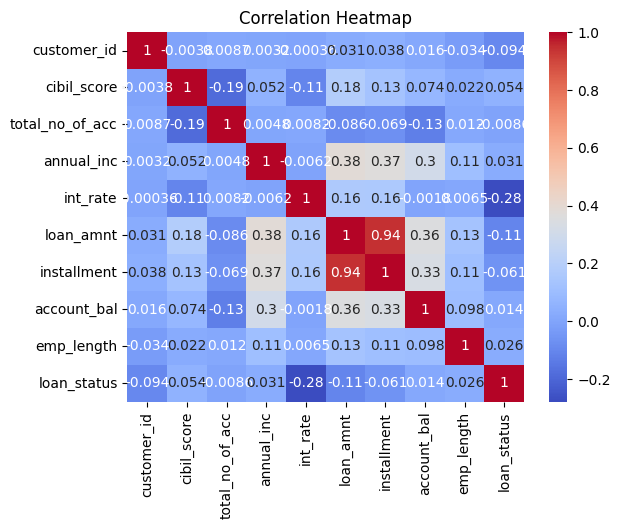

In [ ]:
# Correlation matrix
corr = df.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
